*Import Libraries*

In [2]:
from tensorflow import keras      # print(keras.__version__, tf.__version__)
import matplotlib.pyplot as plt
from sklearn import datasets, model_selection, preprocessing

*Step 1. Load data*<br/>
[Dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html)

In [3]:
data = datasets.fetch_california_housing()
print(f"Data.keys: {data.keys()}")                                      # Information about dataset
print(f"\n Inputs:{data['data']}")                                      # Input data
print(f"\n Labels:{data['target']}")                                    # Targets or Labels
print(f"\n Target_names:{data['feature_names']}")                       # Features name

Data.keys: dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

 Inputs:[[   8.3252       41.            6.98412698 ...    2.55555556
    37.88       -122.23      ]
 [   8.3014       21.            6.23813708 ...    2.10984183
    37.86       -122.22      ]
 [   7.2574       52.            8.28813559 ...    2.80225989
    37.85       -122.24      ]
 ...
 [   1.7          17.            5.20554273 ...    2.3256351
    39.43       -121.22      ]
 [   1.8672       18.            5.32951289 ...    2.12320917
    39.43       -121.32      ]
 [   2.3886       16.            5.25471698 ...    2.61698113
    39.37       -121.24      ]]

 Labels:[4.526 3.585 3.521 ... 0.923 0.847 0.894]

 Target_names:['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [4]:
input_data = data['data']                                         # Input data
labels_data = data['target']                                      # Targets or Labels
print(f"input_data.shape: {input_data.shape}")
print(f"labels.shape: {labels_data.shape}")

input_data.shape: (20640, 8)
labels.shape: (20640,)


*Step 2: [Split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)*<br/>
Split dataset into random train and test subsets<br/>
Split train into random train and validation subsets<br/>

In [5]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(input_data, labels_data, test_size=0.25)  # Split data into train & test
x_train, x_validation, y_train, y_validation = model_selection.train_test_split(x_train, y_train, test_size=0.25) # Split train into train & validation
print(f"x_train.shape:{x_train.shape}")
print(f"x_test.shape:{x_test.shape}")
print(f"x_validation.shape:{x_validation.shape}")
print(f"y_train.shape:{y_train.shape}")
print(f"y_test.shape:{y_test.shape}")
print(f"y_validation.shape:{y_validation.shape}")

x_train.shape:(11610, 8)
x_test.shape:(5160, 8)
x_validation.shape:(3870, 8)
y_train.shape:(11610,)
y_test.shape:(5160,)
y_validation.shape:(3870,)


*Step 3: [Normalize data](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)*


In [6]:
norm = preprocessing.StandardScaler()
x_train_norm = norm.fit_transform(x_train)
x_validation_norm = norm.transform(x_validation)
x_test_norm = norm.transform(x_test)

*Step 4: Wide & Deep Network*<br/>
[Functional API](https://keras.io/guides/functional_api/)<br/>
[Concatenate layer](https://keras.io/api/layers/merging_layers/concatenate/)<br/>
[Article](https://arxiv.org/pdf/1606.07792.pdf)<br/>
Method 1: Single input single output (SISO)

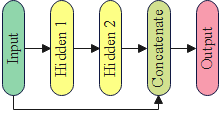

In [7]:
input_ = keras.layers.Input(shape=x_train.shape[1:])               # Single input single output (SISO); Shape: Number of column
hidden_layer1 = keras.layers.Dense(50, activation="relu")(input_)
hidden_layer2 = keras.layers.Dense(10, activation="relu")(hidden_layer1)
concatenate_layer = keras.layers.Concatenate()([input_, hidden_layer2])
output = keras.layers.Dense(1)(concatenate_layer)
model = keras.Model(inputs=[input_], outputs=[output])

*Step 5. Compile Model*

In [27]:
model.compile(loss="mean_squared_error", optimizer="sgd", metrics=["mean_absolute_error"])

*Step 6: Fit, evaluate & predict Model*


In [28]:
history = model.fit(x_train_norm, y_train, epochs=30, validation_data=(x_validation_norm, y_validation))
history.params
history.history
model.summary()
weights, bias = model.layers[1].get_weights()

Epoch 1/30
363/363 [==============================] - 3s 4ms/step - loss: 0.9496 - mean_absolute_error: 0.6299 - val_loss: 26.7333 - val_mean_absolute_error: 0.6410
Epoch 2/30
363/363 [==============================] - 1s 3ms/step - loss: 5.8979 - mean_absolute_error: 0.7214 - val_loss: 23514.4258 - val_mean_absolute_error: 3.6442
Epoch 3/30
363/363 [==============================] - 1s 3ms/step - loss: 817.6606 - mean_absolute_error: 2.7836 - val_loss: 1415.7374 - val_mean_absolute_error: 1.9971
Epoch 4/30
363/363 [==============================] - 1s 3ms/step - loss: 14.4049 - mean_absolute_error: 1.1327 - val_loss: 262.2343 - val_mean_absolute_error: 0.9348
Epoch 5/30
363/363 [==============================] - 1s 4ms/step - loss: 71.9074 - mean_absolute_error: 1.7801 - val_loss: 58.2214 - val_mean_absolute_error: 1.6097
Epoch 6/30
363/363 [==============================] - 1s 2ms/step - loss: 17.3827 - mean_absolute_error: 0.8455 - val_loss: 13.3173 - val_mean_absolute_error: 0.5768

*Plot*

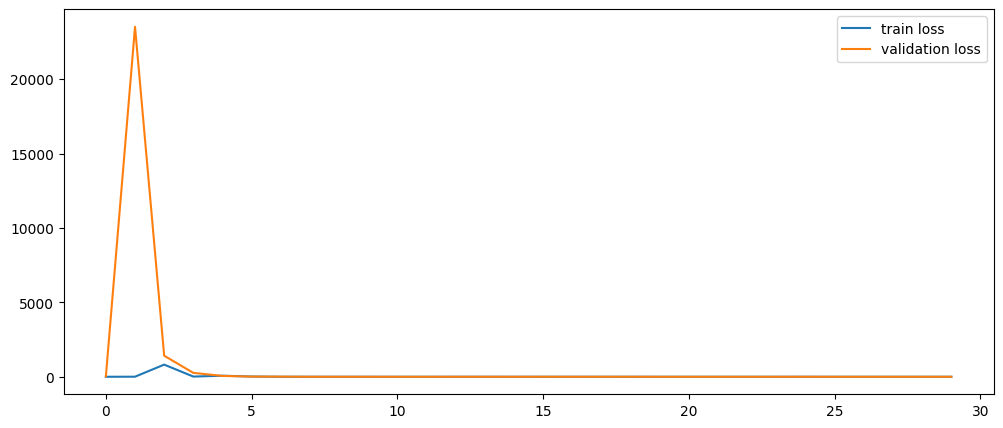

In [30]:
fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(history.history["loss"], label="train loss")
ax.plot(history.history["val_loss"], label="validation loss")
ax.legend()
plt.show()

Method 2: Multi input single output (MISO)

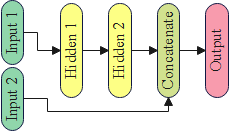

In [ ]:
X_train_s_1, X_train_s_2 = X_train_s[:, :6], X_train_s[:, -4:]
X_validation_s_1, X_validation_s_2 = X_validation_s[:, :6], X_validation_s[:, -4:]
X_test_s_1, X_test_s_2 = X_test_s[:, :6], X_test_s[:, -4:]

input_1 = keras.layers.Input(shape=[6])        # Multi input single output (MISO); Shape for first layer: 6 column
input_2 = keras.layers.Input(shape=[4])        # Shape for second layer: 4 column
hidden_layer1 = keras.layers.Dense(50, activation="relu")(input_1)
hidden_layer2 = keras.layers.Dense(10, activation="relu")(hidden_layer1)
concatenate_layer = keras.layers.Concatenate()([input_2, hidden_layer2])
output = keras.layers.Dense(1)(concatenate_layer)
model = keras.Model(inputs=[input_1, input_2], outputs=[output])